In [1]:
#Importar modulos
import gpxpy
import pandas
import folium
from numpy import* 
from matplotlib import patches
import matplotlib.pyplot as plt



In [36]:
#Leer los archivo gpx
gpx = gpxpy.parse(open("Puntos estaticos.gpx"))


In [67]:
#Imprimir cuantas pistas, segmentos y puntos 

print("{} track(s)".format(len(gpx.tracks)))
track = gpx.tracks[0]

print("{} segment(s)".format(len(track.segments)))
segment = track.segments[0]

print("{} point(s)".format(len(segment.points)))

1 track(s)
1 segment(s)
402 point(s)


In [68]:
# Extraer nuestros datos del archivo Gpx 
dat = []
segment_length = segment.length_3d()
for point_idx, point in enumerate(segment.points):
    dat.append([point.longitude, point.latitude,point.elevation, point.time])
dat

[[-103.80554333333333,
  19.21231,
  None,
  datetime.datetime(2018, 12, 10, 15, 31, 10)],
 [-103.804945, 19.2121724, None, datetime.datetime(2018, 12, 10, 15, 32, 20)],
 [-103.8047384, 19.2122024, None, datetime.datetime(2018, 12, 10, 15, 32, 37)],
 [-103.804945, 19.2121724, None, datetime.datetime(2018, 12, 10, 15, 32, 54)],
 [-103.804945, 19.2121724, None, datetime.datetime(2018, 12, 10, 15, 33, 4)],
 [-103.804945, 19.2121724, None, datetime.datetime(2018, 12, 10, 15, 33, 30)],
 [-103.8047384, 19.2122024, None, datetime.datetime(2018, 12, 10, 15, 33, 36)],
 [-103.804945, 19.2121724, None, datetime.datetime(2018, 12, 10, 15, 33, 44)],
 [-103.804945, 19.2121724, None, datetime.datetime(2018, 12, 10, 15, 33, 44)],
 [-103.8040571, 19.2158348, None, datetime.datetime(2018, 12, 10, 15, 34, 35)],
 [-103.8040571, 19.2158348, None, datetime.datetime(2018, 12, 10, 15, 34, 55)],
 [-103.80414166666667,
  19.21251,
  None,
  datetime.datetime(2018, 12, 10, 15, 35, 40)],
 [-103.80465166666666,
  

In [69]:
#Crear el DataFrame  donde vamos a representar los datos del archivo gpx
columns = ['Latitude', 'Longitude', 'Altitude', "time"]
df = pandas.DataFrame(dat, columns=columns)

#Se presenta el DataFrame
df

,Latitude,Longitude,Altitude,time
0,-103.805543,19.212310,None,2018-12-10 15:31:10
1,-103.804945,19.212172,None,2018-12-10 15:32:20
2,-103.804738,19.212202,None,2018-12-10 15:32:37
3,-103.804945,19.212172,None,2018-12-10 15:32:54
4,-103.804945,19.212172,None,2018-12-10 15:33:04
5,-103.804945,19.212172,None,2018-12-10 15:33:30
6,-103.804738,19.212202,None,2018-12-10 15:33:36
7,-103.804945,19.212172,None,2018-12-10 15:33:44
8,-103.804945,19.212172,None,2018-12-10 15:33:44
9,-103.804057,19.215835,None,2018-12-10 15:34:35


In [40]:
#Extraer las listas de longitud y latitud del DataFrame 
Long= df["Longitude"]
Lat= df["Latitude"]

In [70]:
#Vamos a crear un ciclo For para obtener el promedio de la latitud y de la longitud
for i in range(len(Long)):
    PromLong = sum(Lat)/len(Long)
for i in range(len(Lat)):
    PromLat = sum(Long)/len(Lat)
        

In [71]:
PromLat

19.252418555306797

In [72]:
PromLong

-103.75788277553896

In [73]:
#Crear un ciclo for para la obtencion de la desviacion estandar de la longitud
for r in df.iterrows():
    d = (r[1]["Longitude"]-PromLong)**2
Deslong = sqrt(d)/ len(Long)


In [74]:
#Crear un  ciclo for para la obtencion de la desviacion estandar de la Latitud
for r in df.iterrows():
    d = (r[1]["Latitude"]-PromLat)**2
Deslat = sqrt(d)/ len(Lat)


In [75]:
#Imprimir las desviaciones estanderes obtennidas
print Deslong
print Deslat

0.30603469322273374
0.3059820730231512


In [76]:
#Creacion del mapa con el modulo folium
Map = folium.Map(location=[19.211895000000002,-103.80414166666667], zoom_start =25)

In [77]:
#Creacion del ciclo for
for i in df.iterrows():
    lat= i[1]["Longitude"]
    lon= i[1]["Latitude"]
    folium.Marker((i[1]["Longitude"],i[1]["Latitude"]), popup =folium.Icon(icon='info-sign')).add_to(Map)
                                                                                                                         


In [80]:
#Obtencion del mapa 

Map.save("Mapa de puntos GPS estaticos.html")
Map

In [79]:
#Graficado de las elipces 
xcenter, ycenter = PromLong, PromLat
width, height = (max(Lat)-min(Lat)) , (max(Long)-min(Long))
angle = 45

theta = deg2rad(arange(0.0, 360.0, 1.0))
x = 0.5 * width * cos(theta)
y = 0.5 * height * sin(theta)

rtheta = radians(angle)
R = array([
    [cos(rtheta), -sin(rtheta)],
    [sin(rtheta),  cos(rtheta)],
    ])


x, y = dot(R, array([x, y]))
x += xcenter
y += ycenter

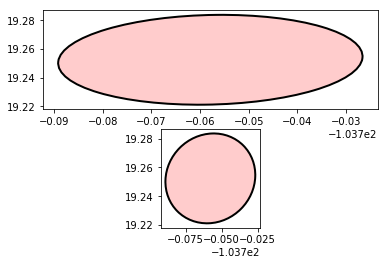

In [66]:
fig = plt.figure()
ax = fig.add_subplot(211, aspect='auto')
ax.fill(x, y, alpha=0.2, facecolor='red',
        edgecolor='Yellow', linewidth=1, zorder=1)

e1 = patches.Ellipse((xcenter, ycenter), width, height,
                     angle=angle, linewidth=2, fill=False, zorder=2)

ax.add_patch(e1)

ax = fig.add_subplot(212, aspect='equal')
ax.fill(x, y, alpha=0.2, facecolor='red', edgecolor='Yellow', zorder=1)
e2 = patches.Ellipse((xcenter, ycenter), width, height,
                     angle=angle, linewidth=2, fill=False, zorder=2)


ax.add_patch(e2)
fig.savefig('ellipse_compare')
plt.show()